# sprawko

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

df = pd.read_csv("dane.csv")
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print(df)

        allan1  allan2
0      50047.0   51227
1      50054.0   51234
2      50061.0   51240
3      50068.0   51247
4      50074.0   51253
...        ...     ...
94709  83979.0    8390
94710  83985.0    8396
94711  83992.0    8402
94712  83999.0    8407
94713  84005.0    8413

[94714 rows x 2 columns]


In [ ]:
df["allan2"]

0        51227
1        51234
2        51240
3        51247
4        51253
         ...  
94709     8390
94710     8396
94711     8402
94712     8407
94713     8413
Name: allan2, Length: 94714, dtype: int64

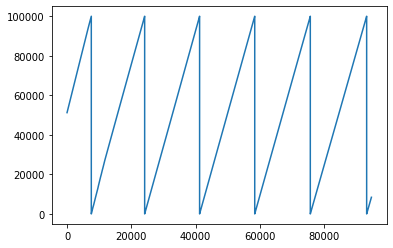

In [ ]:
pyplot.plot(df["allan2"])
pyplot.show()

In [ ]:
df["allan2"] = df["allan2"] - 50000
df["allan2"]

0         1227
1         1234
2         1240
3         1247
4         1253
         ...  
94709   -41610
94710   -41604
94711   -41598
94712   -41593
94713   -41587
Name: allan2, Length: 94714, dtype: int64

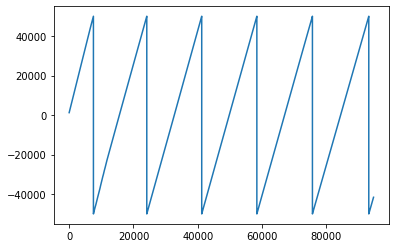

In [ ]:
temp = np.array(df["allan2"].to_numpy())
pyplot.plot(temp)
pyplot.show()

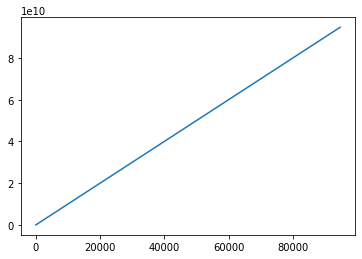

In [ ]:
temp = np.array(df["allan1"].to_numpy())
n=0
m=30000
for i in range(0,len(temp)):

  if( abs(temp[i-1]-temp[i]) >= m ):
    n+=1
  temp[i]=temp[i]+(100000*n)

  

temp = temp*10
pyplot.plot(temp)
pyplot.show()
    



In [ ]:


def ADEV(x,n=3,t0=1e7):
    N=len(x)
    x = np.array(x)
    suma=0
    for i in range(0,N-2*n):
      suma+=np.power((x[i+2*n] - 2*x[i+n] + x[i]),2)
  
    result = np.sqrt( suma/(np.power(2*n,2)*np.power(t0,2)*(N-2*n))  )
    return result


In [ ]:
from tqdm import trange
from threading import Thread

class MyThread(Thread):
  def __init__(self, i, array):
    super().__init__()
    self._i=i
    self._array=array
  def run(self):
    #print(self._i)
    print(ADEV(self._array,self._i))

  def ADEV(self,x,n=3,t0=1e7):
    N=len(x)
    x = np.array(x)
    suma=0
    for i in range(0,N-2*n):
      suma+=np.power((x[i+2*n] - 2*x[i+n] + x[i]),2)
      
    result = np.sqrt( suma/(np.power(2*n,2)*np.power(t0,2)*(N-2*n))  )
    return result

In [ ]:
#
#print(len(tablica_alanow))
#tablica_alanow[23679] = ADEV(temp,200)
#print(len(tablica_alanow))

In [ ]:
threads = []
tablica_alanow=np.array([]) 
ADEV(temp)

tab_size = int(abs(len(temp)/4))

for i in trange(3,tab_size,1):
  tablica_alanow=np.append(tablica_alanow,ADEV(temp,i))

tablica_alanow

100%|██████████| 23675/23675 [1:44:09<00:00,  3.79it/s]


array([3.24942929e-04, 2.81412087e-04, 2.51705013e-04, ...,
       1.92824928e-06, 1.92801569e-06, 1.92778209e-06])

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

x = np.array(range(3,tab_size,1))


fig.add_trace(go.Scatter(
    x=x,
    y=tablica_alanow
))
  
fig.update_layout(xaxis_type="log", yaxis_type="log")
fig.show()


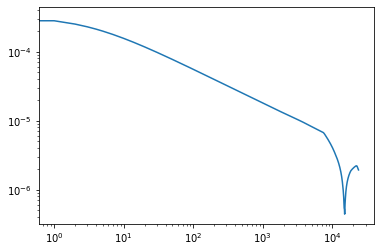

In [ ]:
pyplot.loglog(tablica_alanow)
pyplot.show()